1. Plote um gráfico de T por N, onde T é o tempo médio que demora para conseguirmos pelo menos N caras consecutivas em uma sequência de lançamentos consecutivos de moedas.

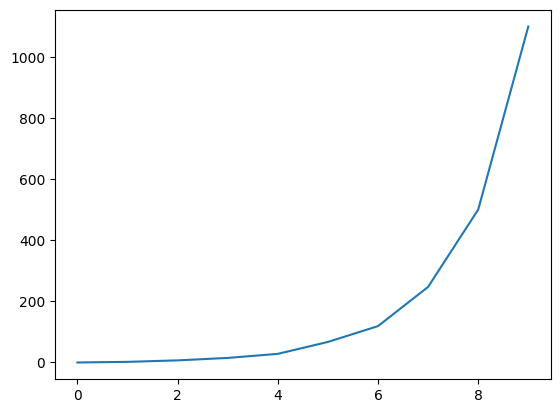

In [13]:
import matplotlib.pyplot as plt
import numpy as np

sims = 100
N = range(10)
T = [0]*10

for n in N:
    for sim in range(sims):
        ct = 0
        while ct!=n:
            if np.random.randint(0,2) == 0:
                ct+=1
            else:
                ct=0
            T[n] += 1
    T[n] /= sims
plt.plot(N,T)


2. No jogo Dungeons & Dragons, quando um jogador ataca um monstro, ele deve rolar um dado de 20 lados (chamado de d20).

2.1 Uma habilidade chamada “Vantagem” permite que o
jogador jogue 2 dados d20 e escolha o melhor resultado. Na média, quão melhor é uma rolagem usando “Vantagem” do que uma rolagem comum (de apenas um dado)?

In [14]:
import matplotlib.pyplot as plt
import numpy as np

sims = 10000
dados = 0
vant = 0

for sim in range(sims):
    dado = np.random.randint(21)
    dados += dado
    vant += max([np.random.randint(21), np.random.randint(21)])

dados /= sims
vant /= sims

print(f'vant: {vant}')
print(f'normal: {dados}')
print('É melhor usar rolagens com vantagem do que rolagens normais.')

vant: 13.5402
normal: 9.9111
É melhor usar rolagens com vantagem do que rolagens normais.


2.2 Suponha que um ataque como descrito acima acerta o monstro se o resultado obtido na rolagem for maior ou igual que a defesa do monstro (D). Em outras palavras, um ataque é bem sucedido se e somente se d20 >= D. Plote 2 gráficos de A por D, onde A é a porcentagem de ataques bem-sucedidos e D é o valor de defesa do monstro variando de 1 a 20, uma linha representando o ataque sem Vantagem e outra com Vantagem (veja exemplo abaixo).

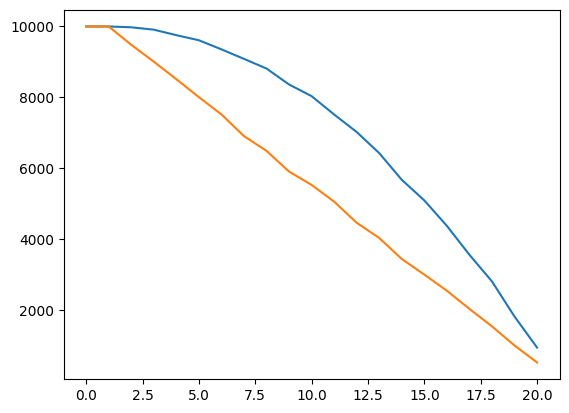

In [15]:
import matplotlib.pyplot as plt
import numpy as np
sims = 10000
D = range(0,21,1)
normal = [0]*len(D)
vant = [0]*len(D)
for ac in D:
    for sim in range(sims):
        dado = np.random.randint(20)+1
        vantagem = max([np.random.randint(20)+1,np.random.randint(20)+1])
        if dado >= ac:
            normal[ac]+=1
        if vantagem >= ac:
            vant[ac]+=1
plt.plot(vant)
plt.plot(normal)

2.3  Você diria que a importância da habilidade “Vantagem” muda conforme D aumenta?

Resposta:

Não, eu diria que a importância da vantagem diminui conforme D aumenta. Isto se dá em razão do comportamento da curva relativa às vantagens bem sucedidas.

3. Suponha que você tem N moedas. Você lança todas elas aleatoriamente e elas saem como cara ou coroa. Então, você seleciona apenas as que saíram como coroa e as lança novamente. Depois do lançamento, você seleciona as que saíram coroa e repete o processo até que todas saiam como cara. Simule o número esperado de lançamentos em função de N.

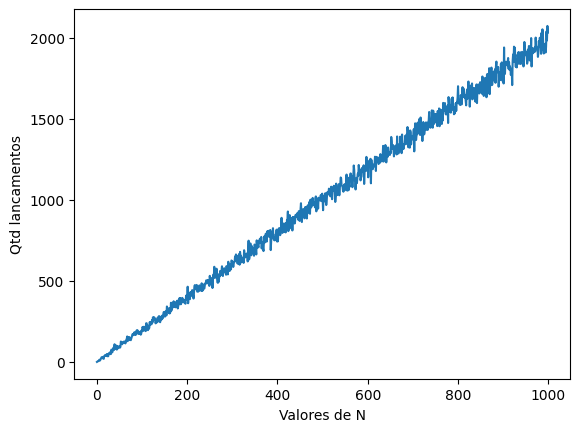

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def jogar_moeda(qtd:int) -> np.array:
    arr = []
    for _ in range(qtd):
        valor = np.random.randint(2)
        arr.append(valor)
    return np.array(arr)

sims = 1000
Ns = 1000
lancamentos = np.zeros(Ns)
for N in range(Ns):
    coroas = N
    for sim in range(sims):
        while coroas!=0:
            lancamentos[N] += coroas
            moedas = jogar_moeda(coroas)
            coroas = len(moedas[moedas == 0])
plt.xlabel('Valores de N')
plt.ylabel('Qtd lancamentos')
plt.plot(range(Ns),lancamentos)

4. Mostre por simulação o curioso resultado de que, para um par de filhos A e B, a probabilidade de que ambos sejam do sexo masculino dado que um deles é do sexo masculino não é 50%.

In [17]:
import matplotlib.pyplot as plt
import numpy as np
sims = 100000
tot = 0

for _ in range(sims):
    filhoA = np.random.randint(2)
    if filhoA == 0:
        filhoB = np.random.randint(2)
        if filhoB == 0:
            tot += 1
    else: 
        continue
tot /= sims
print(f'A probabilidade de que ambos os filhos sejam do sexo masuculino dado que um deles é do sexo masculino é {tot}')

A probabilidade de que ambos os filhos sejam do sexo masuculino dado que um deles é do sexo masculino é 0.25084


5. Uma questão interessante em teoria de probabilidade é o problema do aniversário, que versa sobre a probabilidade de 2 pessoas de um grupo fazerem aniversário em um mesmo dia do ano.

5.1 Plote um gráfico de P por N simulando a probabilidade P de 2 pessoas quaisquer fizeram aniversário no mesmo dia em um grupo de N pessoas.

In [18]:
import matplotlib.pyplot as plt
import numpy as np

qtd_pessoas = 2
max_N = 1000
num_simulations = 1000
Ns = range(1, max_N + 1)
probabilities = []

for N in Ns:
    count = 0
    flags = []
    for _ in range(num_simulations):
        aniversarios = np.random.randint(1, 365, N)
        _, contagem = np.unique(aniversarios, return_counts=True)
        n_unicos = contagem[contagem>=qtd_pessoas]
        if len(n_unicos>0):
            flags.append(True)
    
    probability = len(flags) / num_simulations
    probabilities.append(probability)
plt.plot(Ns, probabilities)

KeyboardInterrupt: 

5.2 Plote o mesmo gráfico para 3 pessoas.

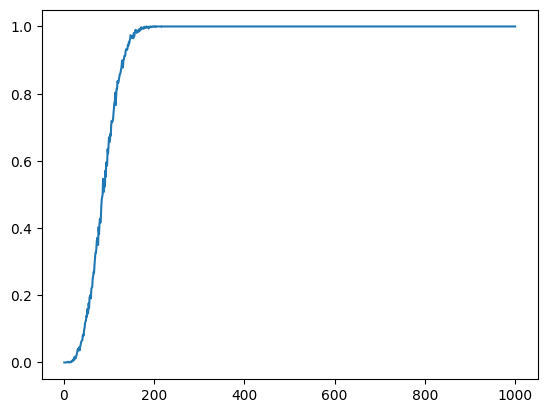

In [18]:
import matplotlib.pyplot as plt
import numpy as np

qtd_pessoas = 3
max_N = 1000
num_simulations = 1000
Ns = range(1, max_N + 1)
probabilities = []

for N in Ns:
    count = 0
    flags = []
    for _ in range(num_simulations):
        aniversarios = np.random.randint(1, 365, N)
        _, contagem = np.unique(aniversarios, return_counts=True)
        n_unicos = contagem[contagem>=qtd_pessoas]
        if len(n_unicos>0):
            flags.append(True)
    
    probability = len(flags) / num_simulations
    probabilities.append(probability)
plt.plot(Ns, probabilities)

6) Assuma que um bêbado está abraçado a um poste no ponto de coordenada (0,0). Considere que o bêbado decide ir para casa, mas em seu estado inebriado ele caminha 1 metro em em uma direção aleatória a cada passo. 

6.2 Plote o histograma do número de passos que o bêbado
leva para alcançar uma distância maior que 5 metros em relação ao poste. 

(array([5.604e+03, 2.747e+03, 1.021e+03, 3.830e+02, 1.520e+02, 5.800e+01,
        2.200e+01, 6.000e+00, 5.000e+00, 2.000e+00]),
 array([  6. ,  25.3,  44.6,  63.9,  83.2, 102.5, 121.8, 141.1, 160.4,
        179.7, 199. ]),
 <BarContainer object of 10 artists>)

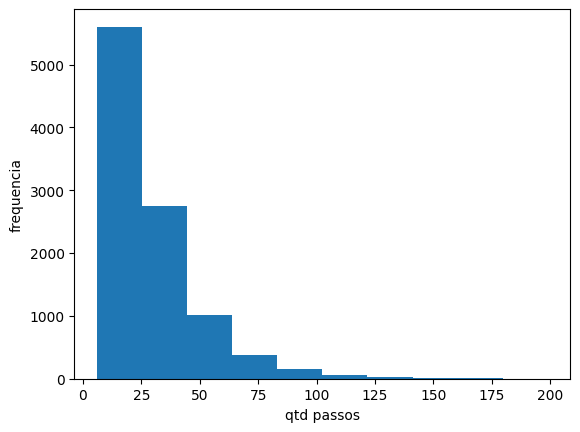

In [16]:
import matplotlib.pyplot as plt
import numpy as np


sims = 10000
passos = [0]*sims
for sim in range(sims):    
    posX = 0
    posY = 0
    dist = 0
    while dist < 5:
        passos[sim] += 1
        
        angulacao = np.random.uniform(0, 2*np.pi)
        x = np.cos(angulacao)
        y = np.sin(angulacao)
        
        posX += x
        posY += y
        dist = np.sqrt((posX-0)**2 + (posY-0)**2)

plt.xlabel('qtd passos')
plt.ylabel('frequencia')
plt.hist(passos)



6.3 Plote um gráfico D por N, mostrando a distância média D que o bêbado está do poste após N passos.

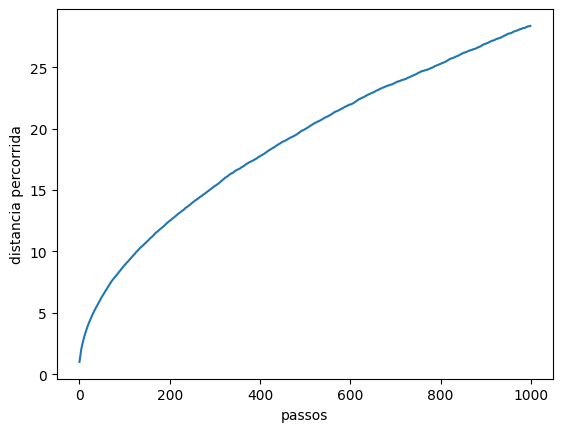

In [24]:
import matplotlib.pyplot as plt
import numpy as np

N = 1000
sims = 10000
passos = range(N)
dist = [0]*N
for sim in range(sims):    
    posX = 0
    posY = 0
    distancia = 0
    for n in range(N):
        angulacao = np.random.uniform(0, 2*np.pi)
        x = np.cos(angulacao)
        y = np.sin(angulacao)
        
        posX += x
        posY += y
        distancia = np.sqrt((posX-0)**2 + (posY-0)**2)
        dist[n] += distancia
dist = np.array(dist)
dist /= sims

plt.xlabel('passos')
plt.ylabel('distancia percorrida')
plt.plot(passos,dist)

7) A figura do final da lista mostra a América do Sul como um grafo de adjacências de países. Suponha um processo markoviano em que, a cada passo, um turista viaja de um país para outro do grafo. A cada passo, o turista sai do país atual e tem probabilidade igual de escolher qualquer um dos países adjacentes como destino. 

7.1 Qual a probabilidade de, após um número grande de passos, o turista estar no Brasil? 

In [5]:
import matplotlib.pyplot as plt
import numpy as np

sims = 10000
passos = 1000

paises = ["FG", "S", "G", "V", "Co", "Br", "Pe", "Bo", "Ch", "A", "U", "Pa", "E"]
grafo = {
    "FG": ["Br", "S"],
    "S": ["FG", "G", "Br"],
    "G": ["S", "V", "Br"],
    "V": ["G", "Co", "Br"],
    "Co": ["V", "E", "Pe", "Br"],
    "Br": ["FG", "S", "G", "V", "Co", "Pe", "Bo", "Pa", "A", "U"],
    "Pe": ["E", "Co", "Br", "Bo", "Ch"],
    "Bo": ["Pe", "Br", "Pa", "A", "Ch"],
    "Ch": ["Pe", "Bo", "A"],
    "A": ["Ch", "Bo", "Pa", "Br", "U"],
    "U": ["A", "Br"],
    "Pa": ["Bo", "Br", "A"],
    "E": ["Co", "Pe"]
}

def monta_matriz(grafo=grafo, paises=paises):
    qtd_paises = len(paises)
    matrix = np.zeros((qtd_paises,qtd_paises))
    
    for index,pais in enumerate(paises):
        adj = grafo[pais]
        tam_adj = len(adj)
        parcela = 1/tam_adj
        for v in adj:
            pos = paises.index(v)
            matrix[index][pos] = parcela
    return matrix

matrix = monta_matriz()

ct = 0
for sim in range(sims):
    # TANTO FAZ O COMECO
    start = np.random.choice(paises)    
    for passo in range(passos):
        adj = grafo[start]
        start = np.random.choice(adj)
    if start == "Br": ct += 1
prob = ct/sims

print(f'A probabilidade de após um grande número de passos o turista estar no brasil é de {prob}')

A probabilidade de após um grande número de passos o turista estar no brasil é de 0.1923


7.2 Quantos passos em média o turista precisa dar para visitar pelo menos uma vez cada país do grafo? 

In [9]:
import matplotlib.pyplot as plt
import numpy as np

sims = 10000

paises = ["FG", "S", "G", "V", "Co", "Br", "Pe", "Bo", "Ch", "A", "U", "Pa", "E"]
grafo = {
    "FG": ["Br", "S"],
    "S": ["FG", "G", "Br"],
    "G": ["S", "V", "Br"],
    "V": ["G", "Co", "Br"],
    "Co": ["V", "E", "Pe", "Br"],
    "Br": ["FG", "S", "G", "V", "Co", "Pe", "Bo", "Pa", "A", "U"],
    "Pe": ["E", "Co", "Br", "Bo", "Ch"],
    "Bo": ["Pe", "Br", "Pa", "A", "Ch"],
    "Ch": ["Pe", "Bo", "A"],
    "A": ["Ch", "Bo", "Pa", "Br", "U"],
    "U": ["A", "Br"],
    "Pa": ["Bo", "Br", "A"],
    "E": ["Co", "Pe"]
}

def monta_matriz(grafo=grafo, paises=paises):
    qtd_paises = len(paises)
    matrix = np.zeros((qtd_paises,qtd_paises))
    
    for index,pais in enumerate(paises):
        adj = grafo[pais]
        tam_adj = len(adj)
        parcela = 1/tam_adj
        for v in adj:
            pos = paises.index(v)
            matrix[index][pos] = parcela
    return matrix

matrix = monta_matriz()

ct=0
for sim in range(sims):
    # TANTO FAZ O COMECO
    start = np.random.choice(paises)
    paises2 = ["FG", "S", "G", "V", "Co", "Br", "Pe", "Bo", "Ch", "A", "U", "Pa", "E"]
    while paises2:
        adj = grafo[start]
        start = np.random.choice(adj)
        if start in paises2:
            paises2.remove(start)
        ct+=1
prob = ct/sims
print(f'A quantidade media de passos para visitar pelo menos uma vez cada país do grafo é {prob}')



A quantidade media de passos para visitar pelo menos uma vez cada país do grafo é 67.5484


7.3 Qual a probabilidade de um turista que está agora no Brasil estar ainda no Brasil daqui 2, 3 ou 4 passos? 

In [10]:
import matplotlib.pyplot as plt
import numpy as np

sims = 10000

paises = ["FG", "S", "G", "V", "Co", "Br", "Pe", "Bo", "Ch", "A", "U", "Pa", "E"]
grafo = {
    "FG": ["Br", "S"],
    "S": ["FG", "G", "Br"],
    "G": ["S", "V", "Br"],
    "V": ["G", "Co", "Br"],
    "Co": ["V", "E", "Pe", "Br"],
    "Br": ["FG", "S", "G", "V", "Co", "Pe", "Bo", "Pa", "A", "U"],
    "Pe": ["E", "Co", "Br", "Bo", "Ch"],
    "Bo": ["Pe", "Br", "Pa", "A", "Ch"],
    "Ch": ["Pe", "Bo", "A"],
    "A": ["Ch", "Bo", "Pa", "Br", "U"],
    "U": ["A", "Br"],
    "Pa": ["Bo", "Br", "A"],
    "E": ["Co", "Pe"]
}

def monta_matriz(grafo=grafo, paises=paises):
    qtd_paises = len(paises)
    matrix = np.zeros((qtd_paises,qtd_paises))
    
    for index,pais in enumerate(paises):
        adj = grafo[pais]
        tam_adj = len(adj)
        parcela = 1/tam_adj
        for v in adj:
            pos = paises.index(v)
            matrix[index][pos] = parcela
    return matrix

matrix = monta_matriz()
ct=0
for sim in range(sims):
    start = 'Br'
    for _ in range(4):
        adj = grafo[start]
        start = np.random.choice(adj)
        if start == 'Br':
            ct+=1
prob = ct/sims

print(f'A probabilidade de estar agora no Brasil e voltar para o Brasil em 2 ou 3 ou 4 passos é: {prob}%')

A probabilidade de estar agora no Brasil e voltar para o Brasil em 2 passos é: 0.7138%


7.4 Qual a probabilidade que em uma caminhada de 10 passos começando no Brasil o turista não visite o Chile?

In [15]:
import matplotlib.pyplot as plt
import numpy as np

sims = 100000

paises = ["FG", "S", "G", "V", "Co", "Br", "Pe", "Bo", "Ch", "A", "U", "Pa", "E"]
grafo = {
    "FG": ["Br", "S"],
    "S": ["FG", "G", "Br"],
    "G": ["S", "V", "Br"],
    "V": ["G", "Co", "Br"],
    "Co": ["V", "E", "Pe", "Br"],
    "Br": ["FG", "S", "G", "V", "Co", "Pe", "Bo", "Pa", "A", "U"],
    "Pe": ["E", "Co", "Br", "Bo", "Ch"],
    "Bo": ["Pe", "Br", "Pa", "A", "Ch"],
    "Ch": ["Pe", "Bo", "A"],
    "A": ["Ch", "Bo", "Pa", "Br", "U"],
    "U": ["A", "Br"],
    "Pa": ["Bo", "Br", "A"],
    "E": ["Co", "Pe"]
}

def monta_matriz(grafo=grafo, paises=paises):
    qtd_paises = len(paises)
    matrix = np.zeros((qtd_paises,qtd_paises))
    
    for index,pais in enumerate(paises):
        adj = grafo[pais]
        tam_adj = len(adj)
        parcela = 1/tam_adj
        for v in adj:
            pos = paises.index(v)
            matrix[index][pos] = parcela
    return matrix

matrix = monta_matriz()
ct=0
for sim in range(sims):
    start = 'Br'
    flag = True
    for _ in range(10):
        adj = grafo[start]
        start = np.random.choice(adj)
        if start == 'Ch':
            flag = False
    if flag: 
        ct += 1
    
prob = ct/sims
print(f'A probabilidade de em uma caminhada de 10 passos começando no Brasil o turista não visite o Chile é de {prob}')

A probabilidade de em uma caminhada de 10 passos começando no Brasil o turista não visite o Chile é de 0.62438


8. No jogo banco imobiliário, você joga 2d6 (obtendo um resultado de 2 a 12) e anda esse número de espaços ao redor do tabuleiro (veja por exemplo a imagem do tabuleiro no final desta lista). Os espaços com retângulos coloridos representam propriedades imobiliárias (ignore os efeitos dos outros espaços).

8.1 Considerando que uma partida de Banco Imobiliário demora um tempo tendendo a infinito (como qualquer pessoa que já jogou Banco Imobiliário pode confirmar), qual a probabilidade de cairmos em cada propriedade após um número muito grande de jogadas? 

In [31]:
Quanto a diferença entre as taxas de chegada de uma questão para outra, 

         



1.0
{1: 0.045269206519056714,
 3: 0.04548598223130223,
 4: 0.04555399742960745,
 6: 0.04544597329112269,
 8: 0.045534538535974674,
 9: 0.0455147159247039,
 11: 0.04555363371196946,
 13: 0.045469796796411416,
 14: 0.04549034684295818,
 17: 0.045658384391712256,
 19: 0.045489801266501186,
 21: 0.045584913428837096,
 23: 0.04525374851944189,
 26: 0.04554945095913251,
 28: 0.045503986254383025,
 29: 0.04539087006896632,
 31: 0.045275389718902645,
 33: 0.04550525926611601,
 34: 0.04534358677602686,
 36: 0.04539559839826027,
 38: 0.04533231152924899,
 39: 0.04539850813936423}



8.2 Considerando agora que ao parar no espaço do canto superior direito do tabuleiro (“vá para a prisão”), o jogador é transportado para o espaço inferior esquerdo (“prisão”), simule novamente as probabilidades. 

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

def d6(qtd:int)-> int:
    return np.random.randint(1,7,qtd).sum()

NUM_ESPACOS = 40
PROPRIEDADES = [1, 3, 4, 6, 8, 9, 11, 13, 14, 17, 19, 21, 23, 26, 28, 29, 31, 33, 34, 36, 38, 39]
VA_PARA_PRISAO = 30
PRISAO = 10

sims = 10000
jogadas = 1000

count = {}
for prop in PROPRIEDADES:
    count[prop]=0

for sim in range(sims):
    start = 0
    for jogada in range(jogadas):
        start = (start + d6(2))%NUM_ESPACOS
        if start == VA_PARA_PRISAO:
            start = PRISAO
        elif start in PROPRIEDADES:
            count[start] += 1
total_visitas = sum(count.values())
probs = {prop:visitas/total_visitas for prop, visitas in count.items()}
print('Eis a probabilidade de cair em cada uma das propriedades considerando a prisao:')
pprint(probs)

Eis a probabilidade de cair em cada uma das propriedades considerando a prisao:
{1: 0.04210381502479875,
 3: 0.0431083514461501,
 4: 0.0424411607106432,
 6: 0.042069238921423155,
 8: 0.042200774468127145,
 9: 0.04241664643629225,
 11: 0.04238463152575929,
 13: 0.045212737251068065,
 14: 0.04633142969626265,
 17: 0.05124544404955323,
 19: 0.04983788564017838,
 21: 0.04909239558062516,
 23: 0.04838916520297545,
 26: 0.049665736892684005,
 28: 0.04925722663428343,
 29: 0.04925667780724573,
 31: 0.04909806679334814,
 33: 0.04632813673403641,
 34: 0.045147609775926724,
 36: 0.04200868500492938,
 38: 0.040960974189945015,
 39: 0.04144321021374435}


8.3 Considerando que as melhores propriedades imobiliárias são aquelas onde os jogadores param com frequência, qual você diria que é a melhor cor de propriedades no tabuleiro?

Resposta: 

Considerando o resultado do último teste, as melhores cores do tabuleiro são laranja, vermelho e amarelo, pois possuem as probabilidades altas e parecidas. Vale a pena pegar o primeiro verde, logo após o "vá para prisão".

 17: 0.05124544404955323 LARANJA

 19: 0.04983788564017838 LARANJA

 21: 0.04909239558062516 VERMELHO

 23: 0.04838916520297545 VERMELHO

 26: 0.049665736892684005 AMARELO

 28: 0.04925722663428343 AMARELO

 29: 0.04925667780724573 AMARELO
 
 31: 0.04909806679334814 PRIMEIRO VERDE




9) Os times de futebol Vermelho FC e Azul FC jogam uma partida. Suponha que os times marcam gols de forma independente seguindo processos de Poisson com taxas de chegada λv = 2/partida e λa = 3/partida. Qual a taxa de partidas que podemos esperar que o time Vermelho FC ganha? 


In [19]:
import matplotlib.pyplot as plt
import numpy as np

LAMB_V = 2
LAMB_A = 3
T_INICIAL = 0
T_FINAL = 1
sims = 10000

def num_eventos(lamb, t_final=T_FINAL, t_inicial=T_INICIAL):
    return lamb * (t_final - t_inicial)

ct=0
for sim in range(sims):
    eventos_v = np.random.poisson(num_eventos(LAMB_V))
    eventos_a = np.random.poisson(num_eventos(LAMB_A))
    if eventos_v > eventos_a:
        ct+=1
prob = ct/sims
print(f'A taxa de partidas que podemos esperar que o time Vermelho FC ganhe é de {prob}')


A taxa de partidas que podemos esperar que o time Vermelho FC ganhe é de 0.2442



9.1 Resolva o mesmo exercício para os times de basquete RedCats e BlueDogs, assumindo taxas de chegada de pontos de λr = 100/partida e λb = 150/partida, respondendo quantas vezes podemos esperar que o time RedCats ganha. 


In [20]:
import matplotlib.pyplot as plt
import numpy as np

LAMB_R = 100
LAMB_B = 150
T_INICIAL = 0
T_FINAL = 1
sims = 10000

def num_eventos(lamb, t_final=T_FINAL, t_inicial=T_INICIAL):
    return lamb * (t_final - t_inicial)

ct=0
for sim in range(sims):
    eventos_r = np.random.poisson(num_eventos(LAMB_R))
    eventos_b = np.random.poisson(num_eventos(LAMB_B))
    if eventos_r > eventos_b:
        ct+=1
prob = ct/sims
print(f'A taxa de partidas que podemos esperar que o time RedCats ganhe é de {prob}')

A taxa de partidas que podemos esperar que o time RedCats ganhe é de 0.0007


9.2 Compare os resultados e explique

No jogo de futebol, as taxas de chegada lambda são menores, isto é, a probabilidade de um time ganhar disparado é maior. NO basquete as taxas de chegada são consideravelmente maiores, então é menos provável que um time ganhe disparado do outro, isto é, o jogo de basquete é decidido por pequenas diferenças nas pontuações.